# Introduccion:
El objetivo de este proyecto es doble. En la primera parte, nos enfocamos en priorizar diversas hipótesis utilizando dos frameworks de evaluación: ICE (Impacto, Confianza, Esfuerzo) y RICE (Alcance, Impacto, Confianza, Esfuerzo). Estas hipótesis han sido formuladas para mejorar diferentes aspectos del negocio, desde la experiencia del usuario hasta las estrategias de marketing. Cada hipótesis se valora en función de su potencial impacto, confianza en su efectividad, y el esfuerzo necesario para implementarla. Utilizaremos tanto el método ICE como RICE para determinar cuáles hipótesis deben ser probadas primero y cómo cambian las prioridades cuando se tiene en cuenta el alcance potencial de cada hipótesis.

En la segunda parte del proyecto, llevaremos a cabo un análisis detallado de los resultados de un test A/B, que se ha diseñado para validar las hipótesis priorizadas. Este test se basa en datos reales de pedidos y visitas de usuarios, donde se mide el impacto de diferentes cambios propuestos. Analizaremos diversas métricas clave como los ingresos acumulados, el tamaño promedio de los pedidos, y la tasa de conversión por grupo de test, entre otras. También se realizarán análisis estadísticos para determinar la significancia de las diferencias observadas entre los grupos A y B.

**El proceso incluye:**

**Priorizar Hipótesis:**

* Aplicar los frameworks ICE y RICE para priorizar las hipótesis en función de su impacto estimado, alcance y recursos necesarios.
* Comparar cómo cambian las prioridades entre los frameworks y justificar las diferencias.

**Análisis del Test A/B:**

* Visualizar y comparar ingresos acumulados, tamaños de pedido promedio y tasas de conversión entre los grupos A y B.
* Identificar patrones significativos y anomalías en los datos.
* Realizar pruebas estadísticas para evaluar la significancia de los resultados obtenidos.

**Preprocesamiento de Datos:** Antes de proceder con los análisis, es fundamental realizar un preprocesamiento exhaustivo de los datos. Este paso garantiza la calidad y fiabilidad de los resultados, eliminando posibles errores o inconsistencias, como visitantes que participaron en ambos grupos del test A/B, y otros problemas que pudieran sesgar los resultados.

**Conclusión:** Al final del proyecto, se formularán recomendaciones basadas en los hallazgos del test A/B, considerando si alguno de los grupos debe ser considerado líder, si no hay diferencias significativas entre los grupos, o si es necesario continuar con más pruebas. Este enfoque basado en datos permitirá a la tienda en línea tomar decisiones estratégicas más informadas, optimizando así sus estrategias de marketing y maximizando los ingresos.

## Descripción de los datos

Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv

* Hypotheses: breves descripciones de las hipótesis
* Reach: alcance del usuario, en una escala del uno a diez
* Impact: impacto en los usuarios, en una escala del uno al diez
* Confidence: confianza en la hipótesis, en una escala del uno al diez
* Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.
Datos utilizados en la segunda parte del proyecto

 /datasets/orders_us.csv

* transactionId: identificador de pedido
* visitorId: identificador del usuario que realizó el pedido
* date: fecha del pedido
* revenue: ingresos del pedido
* group: el grupo del test A/B al que pertenece el usuario

/datasets/visits_us.csv

* date: la fecha
* group: grupo del test A/B
* visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Siempre trata de incluir esta sección introductoria en tus proyectos para que sea más fácil entender el porque del ánalisis 
</div>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [33]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders= pd.read_csv('/datasets/orders_us.csv')
visits= pd.read_csv('/datasets/visits_us.csv')
hypotheses.head()

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


# Dataframe Hypotheses

In [3]:
hypotheses.info()
print()
print()
hypotheses.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes




,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


# Dataframe Orders

In [4]:
orders.info()
print()
print()
#le damos el formato correcto a la columna date
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

print(orders.head())
print()
print()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B




,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


### Observacion:
podemos ver que cuanto a los datos tenemos una muestra de solo 1 mes que van desde el 2019-08-01 hasta el 2019-08-31, en cuanto a los ingresos tenemos presencia de una compra atipica de 19920.40 la media de compra ronda entre los 131.49 y el minimo de compra ronda entre los 5.

# Dataframe Visits

In [5]:
visits.info()
#le damos el formato correcto a la columna date
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

print()
print()
visits.head()
print()
print()
visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB






,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


### Observacion:

Podemos ver que tambien tenemos una muestra de datos de solo 1 mes como en el dataset anterior y la media de visitas diarias ronda en las 607. su maximo esta en las 770 visitas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión inicial de tus datos, siempre es importante entender con lo que trabajarás!
</div>

# **Priorizar hipótesis**

## **Aplicamos el framework ICE para priorizar hipótesis. Las Ordenamos en orden descendente de prioridad**

In [6]:
hypotheses['ICE']= (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

print(hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### Observacion:

En este caso solo tomamos las hipotesis que su ICE fuese mayor a 10 el ICE presenta con indice 8, 0, y 7 como las hipótesis más prometedoras

## **Aplicamos el framework RICE para priorizar hipótesis. Las Ordenamos en orden descendente de prioridad.**

In [7]:
hypotheses['RICE']= (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


### Observacion:
En este caso todo cambio debido al nivel de Reach de las hipotesis, las hipótesis más prometedoras ahora son la 7, 2, 0, 6 y 8. Sin embargo, esta vez, el número 7 ocupa el primer lugar. Esto se debe a que su parámetro Reach es 10, el numero 2 en el anterior estudio no era muy relevante en este caso ocupa la posicion numero 2 ya que su Reach es de 8, mientras que las otras hipótesis tienen valores más bajos.

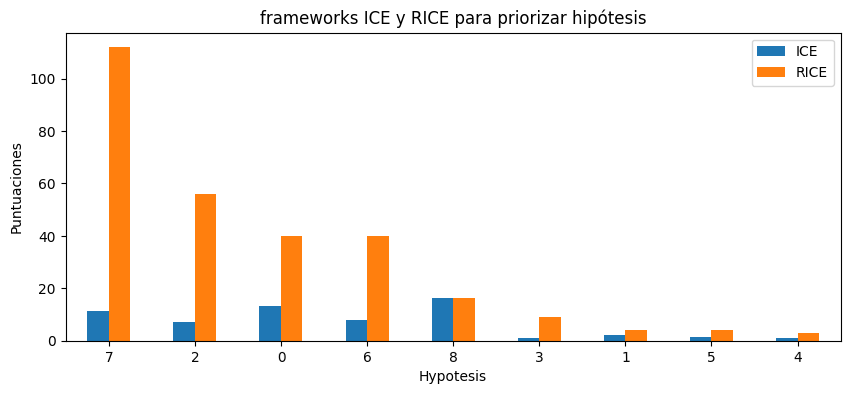

In [8]:
hypotheses_ICE_RICE= hypotheses[['ICE', 'RICE']].sort_values(by=['RICE'], ascending=False)
hypotheses_ICE_RICE.plot(ylabel='Puntuaciones', xlabel='Hypotesis', kind='bar', title='frameworks ICE y RICE para priorizar hipótesis', rot=1, figsize=[10, 4]) #Generamos la Visualizacion con el nuevo Dataframe 'group_month' 
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo agregando la gráfica!
</div>

## **Encontramos usuarios que están en ambos grupos A y B**

In [9]:
# Encontrar usuarios que están en ambos grupos A y B
users_in_both_groups = orders[orders.groupby('visitorId')['group'].transform('nunique') > 1]['visitorId'].unique()

print('Usuarios en ambos grupos A y B:', users_in_both_groups)

print('\nCantidad de usuarios en ambos grupos A y B:', len(users_in_both_groups))
print()
print()
#Verificamos cuantos datos en total seran eliminados
print('Total Datos Eliminados: ', orders[orders['visitorId'].isin(users_in_both_groups)].shape)

Usuarios en ambos grupos A y B: [4069496402  963407295  351125977 3234906277  199603092  237748145
 3803269165 2038680547 2378935119 4256040402 2712142231    8300375
  276558944  457167155 3062433592 1738359350 2458001652 2716752286
 3891541246 1648269707 3656415546 2686716486 2954449915 2927087541
 2579882178 3957174400 2780786433 3984495233  818047933 1668030113
 3717692402 2044997962 1959144690 1294878855 1404934699 2587333274
 3202540741 1333886533 2600415354 3951559397  393266494 3972127743
 4120364173 4266935830 1230306981 1614305549  477780734 1602967004
 1801183820 4186807279 3766097110 3941795274  471551937 1316129916
  232979603 2654030115 3963646447 2949041841]

Cantidad de usuarios en ambos grupos A y B: 58


Total Datos Eliminados:  (181, 5)


In [10]:
#Se eliminan los datos con errores de grupos 181 datos en total
orders= orders[~orders['visitorId'].isin(users_in_both_groups)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [11]:
#Verificamos los usuarios unicos para saber que porcentaje de usuarios y date fue eliminada.
print('Usuarios Unicos: ', orders['visitorId'].unique().shape)
print()
print('porcentaje de datos Eliminados: ', round((181*100)/1197), '%')
print()
print('porcentaje de usuarios unicos Eliminados: ', round((58*100)/973), '%')

Usuarios Unicos:  (973,)

porcentaje de datos Eliminados:  15 %

porcentaje de usuarios unicos Eliminados:  6 %


### Observacion:
Detectamos los datos de usuarios erroneos donde se registraron en ambos grupos y se procedio a realizar la eliminacion de los mismos ya que no hay forma en este caso de saber exactamente de que grupo realmente provienen. El porcentaje total de datos eliminados fue de un 15% el cual es un poco alto y el porcentaje total de usuarios unicos eliminados es de 6%.

# **Análisis de test A/B**

## **Representamos gráficamente el ingreso acumulado por grupo.**

In [12]:
# creamos una matriz con valores únicos de parejas fecha-grupo
datesGroups = orders[['date', 'group']].drop_duplicates()

# obtenemos los datos diarios acumulados agregados sobre los pedidos
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#obtenemos los datos diarios acumulados agregados sobre los visitantes
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# fusionamos las dos tablas en una y da a sus columnas nombres descriptivos
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


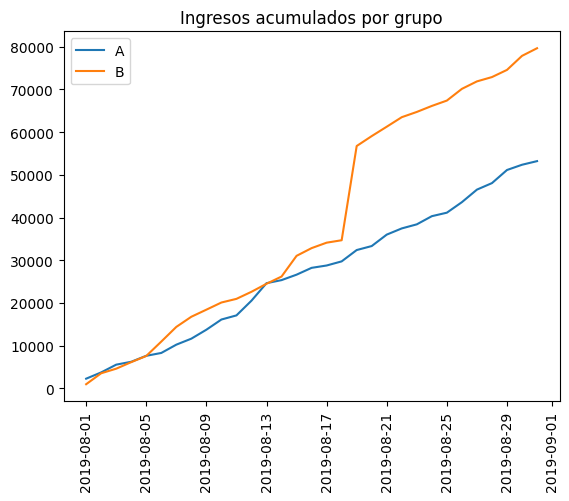

In [13]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Trazamos el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazamos el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=90)
plt.title('Ingresos acumulados por grupo')
plt.legend()

### Observacion:
Los ingresos aumentan constantemente durante toda la prueba.

Sin embargo, podemos ver que ambos grupos tienen picos en los ingresos en ciertos puntos, pero podemos observar que en el grupo B tienen un fuerte aumento el 2019-08-17 Esto puede implicar un aumento en el número de pedidos o la existencia de pedidos muy caros (atipicos) en la muestra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente
</div>

## **Representamos gráficamente el tamaño de pedido promedio acumulado por grupo.**

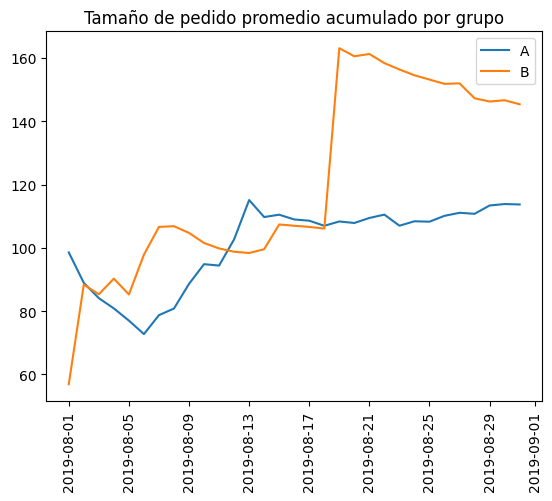

In [14]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=90)
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.legend()

### Observacion:
A primera vista, podemos observar lo siguiente:

* Dos Tendencias Distintas: Tanto el grupo A como el B presentan patrones de comportamiento diferentes a lo largo del período analizado.
* Grupo B: Pico Inicial y Descenso Gradual: El grupo B experimenta un crecimiento rápido al inicio del período, alcanzando un pico y luego descendiendo de manera más gradual.
* Grupo A: Crecimiento Estable: El grupo A muestra un crecimiento más estable y menos pronunciado en comparación con el grupo B.

## Representamos gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

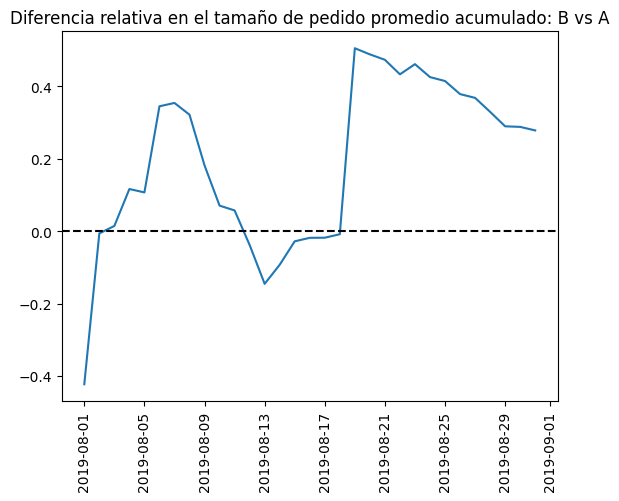

In [15]:
# reunimos los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# trazamos un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# agregamos el eje X
plt.xticks(rotation=90)
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado: B vs A')
plt.axhline(y=0, color='black', linestyle='--')

### Observacion:

A partir del grafico podemos extraer las siguientes conclusiones preliminares:

* Volatilidad Inicial: Al inicio del período, la diferencia entre los grupos fluctuó significativamente, indicando que hubo cambios rápidos en la preferencia de los usuarios.
* Dominancia del Grupo B: A partir de mediados de agosto, el grupo B comenzó a mostrar un tamaño promedio de compra consistentemente mayor que el grupo A, lo que sugiere que alguna acción o cambio implementado en ese grupo tuvo un impacto positivo en el comportamiento de compra.
* En varios puntos, la diferencia entre los segmentos aumenta. ¡Esto significa que deben haber algunos pedidos grandes y valores atípicos!
* Estabilización: Hacia finales del período, la diferencia entre los grupos se estabilizó en torno a un valor positivo, lo que indica que la ventaja del grupo B se mantuvo.

## Calculamos la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representamos gráficamente las tasas de conversión diarias de los dos grupos


(18109.0, 18141.0, 0.0, 0.05)

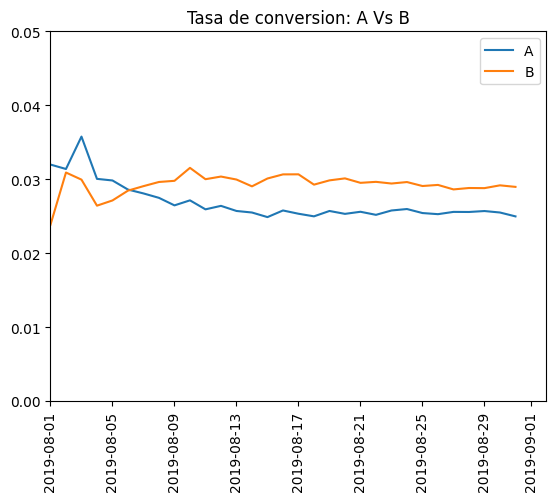

In [16]:
# calculamos la conversión acumulada
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# seleccionamos datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionamos datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazamos los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Tasa de conversion: A Vs B')
plt.xticks(rotation=90)

# establecemos la escala de los ejes
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-02'), 0, 0.05])

### Observaciones:
El gráfico muestra que el Grupo B tuvo una ventaja consistente sobre el Grupo A, esto significa que:

* Al inicio de la prueba, el segmento A tenía una tasa de conversión más alta pero el segmento B ganó gradualmente y se estabilizó en un valor casi constante.
* El Grupo B generó un mayor número de conversiones en comparación con el Grupo A.
* Los cambios implementados en el Grupo B resultaron en un mejor desempeño en términos de tasa de conversión.

No handles with labels found to put in legend.


(18109.0, 18141.0, -0.5, 0.5)

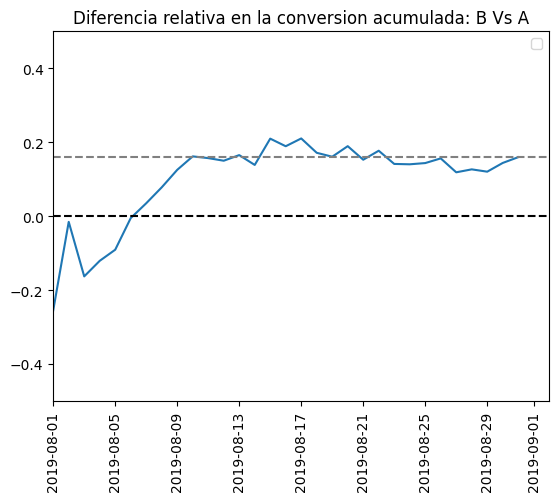

In [17]:
#Vamos a trazar un gráfico de diferencia relativa para las tasas de conversión acumuladas
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()
plt.xticks(rotation=90)
plt.title('Diferencia relativa en la conversion acumulada: B Vs A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-02'), -0.5, 0.5])

### Observacion:
El gráfico proporciona una visión general de la diferencia relativa entre los grupos, se necesitan más análisis para sacar conclusiones definitivas. La falta de una tendencia clara y consistente sugiere que las variaciones introducidas en el grupo B no han tenido un impacto significativo en la tasa de conversión.

## Trazamos un gráfico de dispersión del número de pedidos por usuario.

In [18]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


(array([937.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

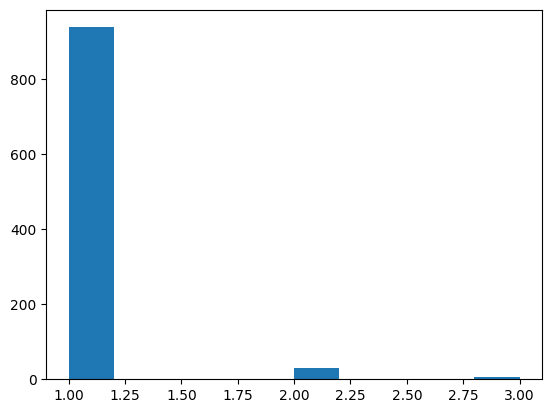

In [19]:
plt.hist(ordersByUsers['orders'])

### Observacion:
La mayoría de los clientes hicieron un solo pedido. Sin embargo, una parte significativa hizo dos a 3 cada uno.

Text(0.5, 1.0, 'Dispersión del número de pedidos por usuario')

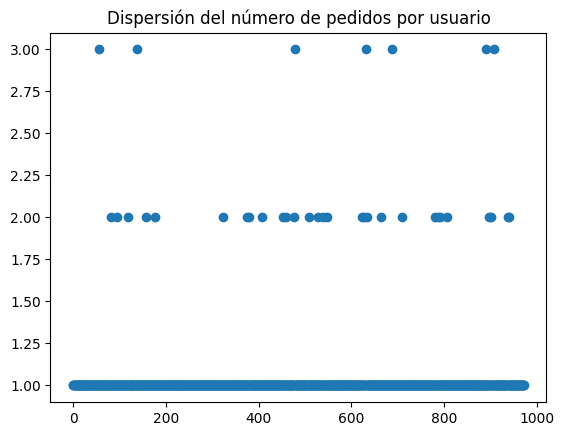

In [20]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Dispersión del número de pedidos por usuario')

### Observacion:
Nuestras conclusiones se han confirmado: de hecho, hay muchos usuarios con dos o 3 pedidos. Se desconoce la proporción exacta, ya que no está claro si debemos considerarlos anomalías o no.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con las visualizaciones y conclusiones desde las mismas, se pueden ver de manera correcta las diferencias entre grupos
</div>

## Calculamos los percentiles 95 y 99 para el número de pedidos por usuario.

In [21]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

## Observacion:
No más del 5% de los usuarios realizaron más de 1 pedido y el 1% de los usuarios realizaron más de 2 pedido.

Por lo tanto, sería razonable establecer 1 pedido por usuario como límite inferior para el número de pedidos y filtrar las anomalías en base a ello.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores anómalos puede ser crucial al momento de mostrar métricas correctas
</div>

## Trazamos un gráfico de dispersión de los precios de los pedidos.

(array([1.014e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+00, 1.996540e+03, 3.988080e+03, 5.979620e+03,
        7.971160e+03, 9.962700e+03, 1.195424e+04, 1.394578e+04,
        1.593732e+04, 1.792886e+04, 1.992040e+04]),
 <BarContainer object of 10 artists>)

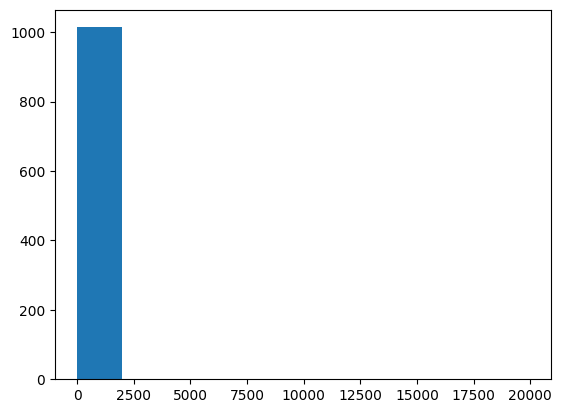

In [22]:
plt.hist(orders['revenue'])

Text(0.5, 1.0, 'Dispersión de los precios de los pedidos')

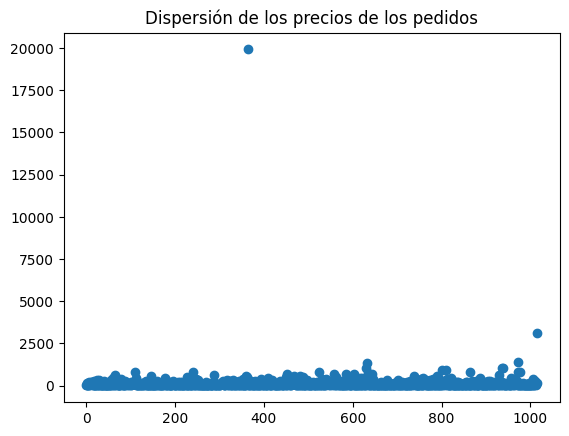

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Dispersión de los precios de los pedidos')

### Observacion:
Tal como esperábamos, hay unos pedidos grandes. Según el gráfico, enocntramos el valor que ya habiamos observado antes con el metodo describe() de 19920.40 y tambien podemos observar otro valor mucho mas bajo que podriamos decir que esta un poco por encima de los 2500.

Todos los demas pedidos se mantienen por debajo de los 2500.

## Calculamos los percentiles 95 y 99 de los precios de los pedidos.

In [24]:
np.percentile(orders['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

### Observacion:

No más del 5% de los pedidos cuestan más de 414.28 y no más del 1% cuestan más de 830.30

Un pedido con un precio superior al percentil 99 (830.30) podría considerarse una anomalía

## Encuentramos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [25]:
#Calculemos la significancia estadística de la diferencia de conversión entre los grupos.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [26]:
# Ahora declararemos las variables sampleA y sampleB, con usuarios de diferentes grupos y números de pedidos correspondientes. Los que no pidieron nada tendrán un 0. Esto es necesario para preparar las muestras para la prueba de Mann-Whitney.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

valor_p1= ("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

diferencia_relativa1= ("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

print('Valor-p en la conversión entre los grupos datos en bruto: ', valor_p1)
print('Diferencia Relativa en la conversión entre los grupos datos en bruto: ', diferencia_relativa1)

Valor-p en la conversión entre los grupos datos en bruto:  0.011
Diferencia Relativa en la conversión entre los grupos datos en bruto:  0.160


### Observacion:
El valor p es inferior a 0.05 por lo que rechazamos la hipótesis nula. El análisis de datos sin procesar mostró que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas. La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 16%.

## Encontramos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [27]:
valor_p2= ('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
diferencia_relativa2= ('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
print('Valor-p en el tamaño promedio de pedido entre los grupos datos en bruto: ', valor_p2)
print('Diferencia Relativa en el tamaño promedio de pedido entre los grupos datos en bruto: ', diferencia_relativa2)

Valor-p en el tamaño promedio de pedido entre los grupos datos en bruto:  0.862
Diferencia Relativa en el tamaño promedio de pedido entre los grupos datos en bruto:  0.278


### Observacion:
El valor p es superior a 0.05 por lo que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos. Además, la diferencia relativa es significativamente positiva del 27.8%.

## Preparamos los Datos Filtrados

In [28]:
#Vamos a crear slices de datos con los usuarios que realizaron más de 1 pedido (usersWithManyOrders)
#los usuarios que realizaron pedidos por más de $2500 (usersWithExpensiveOrders).
#Los uniremos en una tabla llamada abnormalUsers
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 2500]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders],
                          axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head())
print(abnormalUsers.shape)

33    249864742
36    366673373
51    406208401
67    522292794
58    611059232
dtype: int64
(38,)


### Observacion:

En total, tenemos 38 usuarios anómalos

## Encuentramos la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [29]:
#  Primero prepararemos muestras del número de pedidos por usuario para cada grupo de prueba
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)

# Apliquemos el criterio estadístico de Mann-Whitney a las muestras resultantes
valor_p3= ("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
diferencia_relativa3= ("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

print('Valor-p en la conversión entre los grupos datos filtrados: ', valor_p3)
print('Diferencia Relativa en la conversión entre los grupos datos filtrados: ', diferencia_relativa3)

Valor-p en la conversión entre los grupos datos filtrados:  0.011
Diferencia Relativa en la conversión entre los grupos datos filtrados:  0.178


### Observacion:
Igual que con los datos sin procesar, hemos alcanzado el nivel de significación. El segmento B es mucho mejor que el segmento A. La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 17.8%.

## Encuentramos la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [30]:
#Vamos a ver qué ocurre con los valores del tamaño medio de los pedidos
valor_p4= ('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

diferencia_relativa4= ('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

print('Valor-p en el tamaño promedio de pedido entre los grupos datos filtrados: ', valor_p4)
print('Diferencia Relativa en el tamaño promedio de pedido entre los grupos datos filtrados: ', diferencia_relativa4)

Valor-p en el tamaño promedio de pedido entre los grupos datos filtrados:  0.850
Diferencia Relativa en el tamaño promedio de pedido entre los grupos datos filtrados:  -0.066


### Observacion:
* Valor-p = 0.850: Al igual que en la primera prueba, el valor-p sigue siendo alto, lo que sugiere que no hay evidencia suficiente para concluir que existe una diferencia significativa entre los grupos, incluso después de eliminar los usuarios anómalos.

* Diferencia relativa = -0.066: En este caso, la diferencia relativa es negativa y de menor magnitud, lo que indica que el grupo B tiene un tamaño promedio de pedido ligeramente inferior al grupo A después de filtrar los datos.

## Tomamos una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

### Observaciones:
* Hay una diferencia estadísticamente significativa en la conversión entre los grupos, según los datos sin procesar y filtrados.
* Los datos sin procesar y no mostraron una diferencia estadísticamente significativa entre los grupos en cuanto a tamaño promedio de compra. Sin embargo, después de eliminar las anomalías, la diferencia relativa es negativa y de menor magnitud, lo que indica que el grupo B tiene un tamaño promedio de pedido ligeramente inferior al grupo A después de filtrar los datos.
* El gráfico de la diferencia de conversión entre los grupos muestra que los resultados del grupo B son mejores que los del grupo A: tienen tendencia a crecer o se estabilizaron alrededor de la media pero aun no es muy clara su estabilidad.
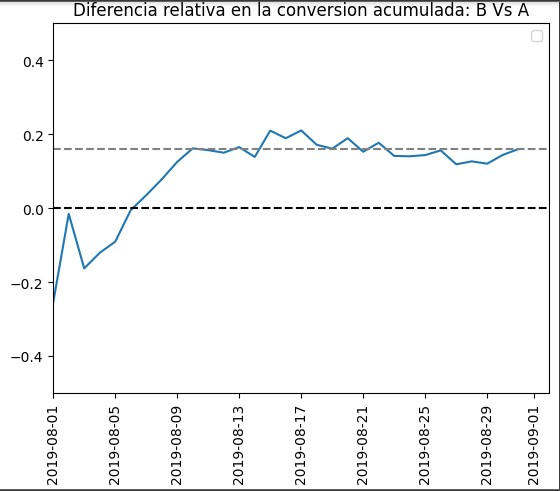

* El gráfico de la diferencia en el tamaño promedio de compra muestra fluctuaciones: fue este gráfico el que nos permitió detectar anomalías. No se pueden sacar conclusiones definitivas de este gráfico.
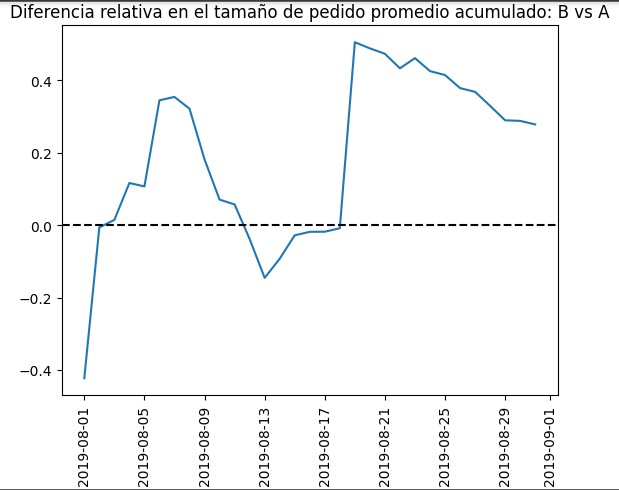

### Conclusion:
* En cuanto a los datos Analizados podemos decir que El Grupo B tiene una tasa de conversión consistentemente más alta que el Grupo A, incluso después de filtrar los valores atípicos. Esto sugiere que los cambios implementados en el Grupo B han tenido un impacto positivo en el comportamiento de compra.

* En cuanto al Ingresos acumulados por grupo el Grupo B tambien Supera al A y se mantiene estable y de forma creciente.

* El Tamaño de pedido promedio acumulado por grupo no es muy claro ya que presenta inestabilidad de picos en ambos grupos

* En cuanto a la diferencia estadísticamente significativa entre los grupos en cuanto a tamaño promedio de compra no mostraron diferencia alguna tanto con los datos filtrados como no filtrados y este es el punto que realmente nos importa, se podria decir que con el analisis de los datos filtrados el promedio de compra del grupo B es ligeramente inferior al A.

Recomendaciones:

* **Continuar la prueba:** Aunque los resultados preliminares sugieren que el Grupo B tiene un mejor rendimiento, es recomendable continuar la prueba para obtener más datos y confirmar la estabilidad de la tendencia. Esto permitirá tomar decisiones más informadas sobre la implementación de cambios a largo plazo.

* Seguir monitoreando pedidos con valores inusualmente altos. Investiga más a fondo estos pedidos para entender qué factores contribuyeron a su alto valor. Esto podría revelar oportunidades para aumentar el valor promedio de los pedidos en general.

* Observamos que una parte significativa de los usuarios realizan múltiples pedidos. Diseña estrategias para fomentar la repetición de compras, como programas de fidelización, descuentos exclusivos para clientes recurrentes o recomendaciones personalizadas basadas en compras anteriores.

* Además de las recomendaciones anteriores, es importante considerar otros factores que pueden influir en los ingresos, como el costo de adquisición de clientes, el margen de beneficio por producto y la competencia en el mercado.